In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

pro = pd.read_pickle('/data/neon/gopro/pro.pkl')
raw = pd.read_pickle('/data/neon/gopro/raw.pkl')
data = pd.concat([pro, raw], axis=1, keys=[1,0])

In [2]:
data.columns.get_level_values(0)

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', length=9458)

In [3]:
import sklearn
from sklearn.manifold import Isomap
model = Isomap()
fit = model.fit_transform(data.T, data.columns.get_level_values(0))

/usr/lib/pymodules/python2.7/sklearn/neighbors/base.py:23: UserWarning: kneighbors: neighbor k+1 and neighbor k have the same distance: results will be dependent on data order.
  warnings.warn(msg)
/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


In [4]:
fit[:,0]

array([ 18.28625903,   9.9118625 ,  -0.06880808, ...,   0.1174687 ,
         0.40865129,   1.2856697 ])

/usr/lib/pymodules/python2.7/matplotlib/collections.py:446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


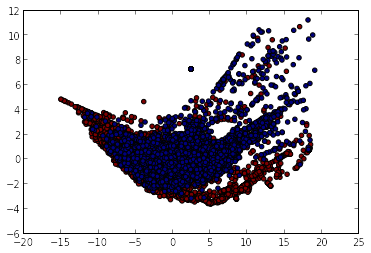

In [5]:
import matplotlib.pyplot as plt
colors = ['r' if x else 'b' for x in data.columns.get_level_values(0)]
plt.scatter(fit[:,0], fit[:,1], c=data.columns.get_level_values(0), marker='o')

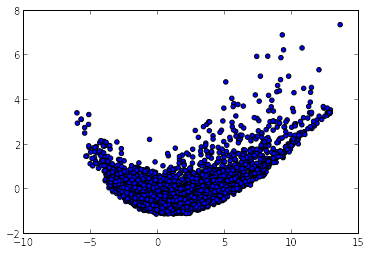

In [6]:
plt.scatter(pro.ix[0,:], pro.ix[1,:])


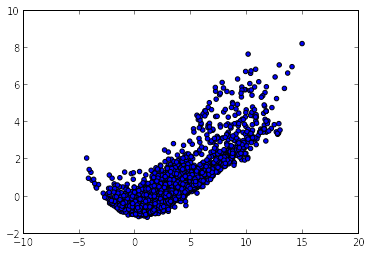

In [7]:
plt.scatter(raw.ix[0,:], raw.ix[1,:])

In [8]:
demo_weights = pd.read_pickle('/home/mdesnoyer/src/neon3/model/demographics/20160713-aquilav2-weight.pkl')
raw_weights = raw.mean(axis=1)
raw_weights /= raw_weights.sum()
pro_weights = pro.mean(axis=1)
pro_weights /= pro_weights.sum()
pd.concat([raw_weights, pro_weights, 
           (0.5*pro_weights+0.5*demo_weights['None']['None']), 
           (0.3*pro_weights+0.7*demo_weights['None']['None']),
           (0.1*pro_weights+0.9*demo_weights['None']['None']),
          ], keys=('raw','pro', '5050', '3070', '1090'), axis=1).to_pickle('/data/neon/gopro/gopro_weights.pkl')

In [9]:
demo_weights.columns.get_level_values(1)

Index([u'18-19', u'20-29', u'30-39', u'40-49', u'50+', u'None', u'18-19',
       u'20-29', u'30-39', u'40-49', u'50+', u'None', u'18-19', u'20-29',
       u'30-39', u'40-49', u'50+', u'None'],
      dtype='object', name=u'age')

In [2]:
import sklearn.svm
svc_model = sklearn.svm.SVC()
svc_model.fit(data.T, data.columns.get_level_values(0))


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [3]:
svc_model.score(data.T, data.columns.get_level_values(0))

0.77849439627828299

In [4]:
float((data.columns.get_level_values(0) == 1).sum()) / data.shape[1]

0.5783463734404737

In [5]:
import pickle
with open('/data/neon/gopro/gopro_svc.pkl', 'wb') as f:
    pickle.dump(svc_model, f)

In [6]:
svc_model.__dict__

{'C': 1.0,
 '_dual_coef_': array([[ 1.,  1.,  1., ..., -1., -1., -1.]]),
 '_gamma': 0.0009765625,
 '_impl': 'c_svc',
 '_intercept_': array([-6.25593953]),
 '_sparse': False,
 'cache_size': 200,
 'class_weight': None,
 'class_weight_': array([ 1.,  1.]),
 'classes_': array([0, 1]),
 'coef0': 0.0,
 'decision_function_shape': None,
 'degree': 3,
 'dual_coef_': array([[-1., -1., -1., ...,  1.,  1.,  1.]]),
 'epsilon': 0.0,
 'fit_status_': 0,
 'gamma': 'auto',
 'intercept_': array([ 6.25593953]),
 'kernel': 'rbf',
 'max_iter': -1,
 'n_support_': array([3376, 3377], dtype=int32),
 'nu': 0.0,
 'probA_': array([], dtype=float64),
 'probB_': array([], dtype=float64),
 'probability': False,
 'random_state': None,
 'shape_fit_': (9458, 1024),
 'shrinking': True,
 'support_': array([5470, 5471, 5472, ..., 5466, 5468, 5469], dtype=int32),
 'support_vectors_': array([[  1.17433033e+01,   3.49079180e+00,   2.14505151e-01, ...,
           3.12745502e-16,  -3.40832611e-16,  -1.27288286e-16],
        [ 

In [7]:
sklearn.__version__

'0.17.1'